# VGG16

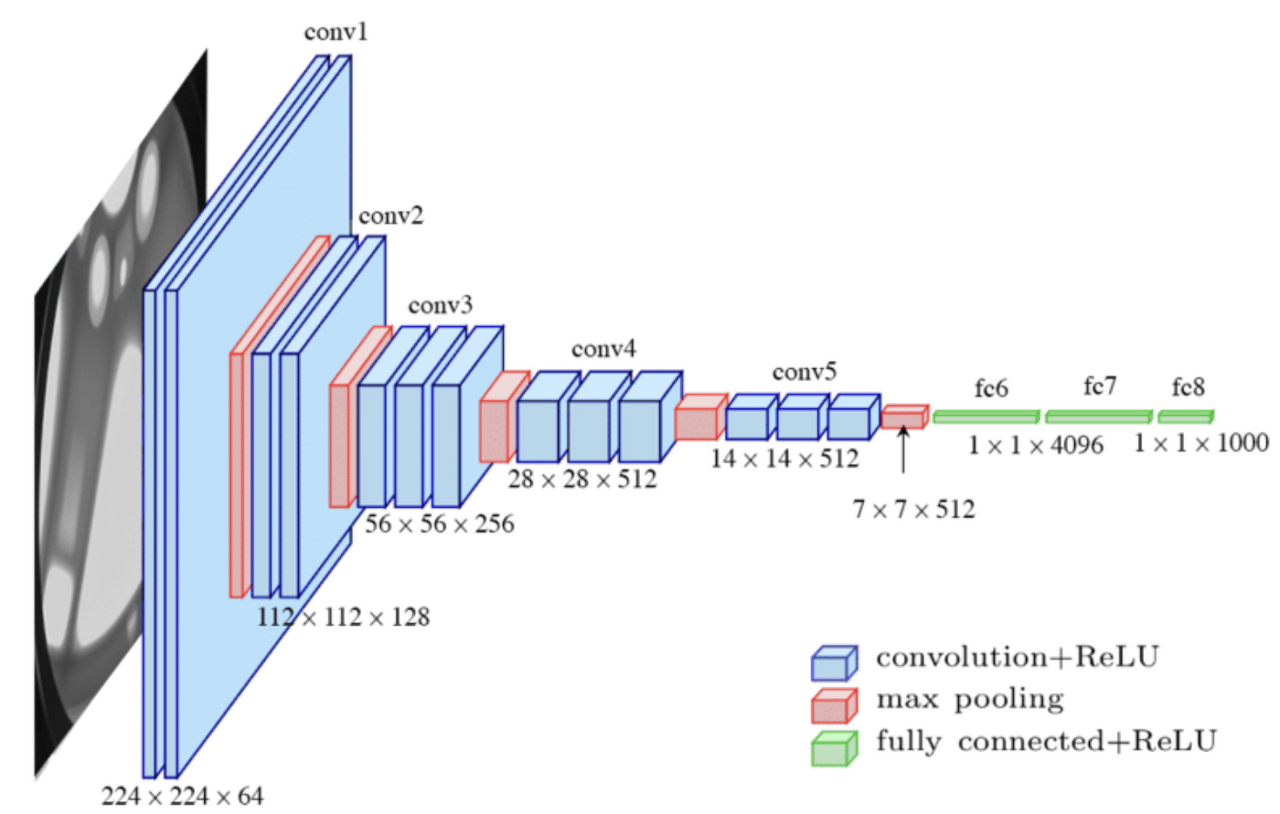



# VGG 기본 블록 정의

- Input
입력 이미지 3x224x224

- Layer C1
3x3 크기의 kernel 64개, stride=1, padding=1인 convolutional layer
입력 크기는 3x224x224 이고, 출력 크기는 64x224x224
- Layer C2 3x3 크기의 kernel 64개, stride=1, padding=1인 convolutional layer
입력 크기는 64x224x224 이고, 출력 크기는 64x224x224
- Layer Maxpool2
2x2 크기의 kernel, stride=2인 maxpooling layer
입력 크기는 64x224x224 이고, 출력 크기는 64x112x112

- Layer C3
3x3 크기의 kernel 128개, stride=1, padding=1인 convolutional layer
입력 크기는 64x112x112 이고, 출력 크기는 128x112x112
- Layer C4
3x3 크기의 kernel 128개, stride=1, padding=1인 convolutional layer
입력 크기는 128x112x112 이고, 출력 크기는 128x112x112
- Layer Maxpool4
2x2 크기의 kernel, stride=2인 maxpooling layer
입력 크기는 128x112x112 이고, 출력 크기는 128x56x56

- Layer C5
3x3 크기의 kernel 256개, stride=1, padding=1인 convolutional layer
입력 크기는 128x56x56 이고, 출력 크기는 256x56x56
- Layer C6
3x3 크기의 kernel 256개, stride=1, padding=1인 convolutional layer
입력 크기는 256x56x56 이고, 출력 크기는 256x56x56
- Layer C7
3x3 크기의 kernel 256개, stride=1, padding=1인 convolutional layer
입력 크기는 256x56x56 이고, 출력 크기는 256x56x56
- Layer Maxpool7
2x2 크기의 kernel, stride=2인 maxpooling layer
입력 크기는 256x56x56 이고, 출력 크기는 256x28x28

- Layer C8
3x3 크기의 kernel 512개, stride=1, padding=1인 convolutional layer
입력 크기는 256x28x28 이고, 출력 크기는 512x28x28
- Layer C9
3x3 크기의 kernel 512개, stride=1, padding=1인 convolutional layer
입력 크기는 512x28x28 이고, 출력 크기는 512x28x28
- Layer C10
3x3 크기의 kernel 512개, stride=1, padding=1인 convolutional layer
입력 크기는 512x28x28 이고, 출력 크기는 512x28x28
- Layer Maxpool10
2x2 크기의 kernel, stride=2인 maxpooling layer
입력 크기는 512x28x28 이고, 출력 크기는 512x14x14

- Layer C11
3x3 크기의 kernel 512개, stride=1, padding=1인 convolutional layer
입력 크기는 512x14x14 이고, 출력 크기는 512x14x14
- Layer C12
3x3 크기의 kernel 512개, stride=1, padding=1인 convolutional layer
입력 크기는 512x14x14 이고, 출력 크기는 512x14x14
- Layer C13
3x3 크기의 kernel 512개, stride=1, padding=1인 convolutional layer
입력 크기는 512x14x14 이고, 출력 크기는 512x14x14
- Layer Maxpool13
2x2 크기의 kernel, stride=2인 maxpooling layer
입력 크기는 512x14x14 이고, 출력 크기는 512x7x7

- Layer F14
ReLU를 활성화 함수로 이용하는 fully connected layer
입력 크기는 25088 이고, 출력 크기는 4096
- Layer F15
ReLU를 활성화 함수로 이용하는 fully connected layer
입력 크기는 4096 이고, 출력 크기는 4096
- Layer F16
ReLU를 활성화 함수로 이용하는 output layer
입력 크기는 4096 이고, 출력 크기는 1000

In [33]:
import torch
import torch.nn as nn


class BasicBlock2(nn.Module): # ❶ 2개 conv층을 가진 블록을 정의합니다.
    # 기본블록을 구성하는 계층의 정의
    def __init__(self, in_channels, out_channels):
        # ❷ nn.Module 클래스의 요소 상속 : 클래스 요소 모두 사용선언
        super(BasicBlock2, self).__init__() #BasicBlock의 내용 + 상속받는 클래스의 변수들까지 상속

        # ❸ 합성곱층 정의 (해당 채널,)
        #입력 채널 수 'in_channels', 출력 채널 수, 컨볼루션 커널 크기 'kernel_size', 컨볼루션 계층의 패딩 크기 'padding'을 사용
        
        # layer1
        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=3, padding=1)#2d convolution 필터 적용
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

        # layer2
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, out_channels, kernel_size=3, padding=1)
        
        self.relu = nn.ReLU()

        #convolution의 window size = 2x2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) 

    def forward(self, x): # ➍  기본블록의 순전파 정의
        x = self.relu(self.conv1(x)) #활성함수 적용
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool(x)

        return x
    
class BasicBlock3(nn.Module): # ❶ 3개 conv층을 가진 블록을 정의합니다.
    # 기본블록을 구성하는 계층의 정의
    def __init__(self, in_channels, out_channels):
        super(BasicBlock3, self).__init__()

        # layer3
        self.conv5 = nn.Conv2d(in_channels, 256, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(256, 256 , kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
       
        
        # layer4
        self.conv8 = nn.Conv2d(256, 512 , kernel_size=3, padding=1)
        self.conv9 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv10 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        

        # layer5
        self.conv11 = nn.Conv2d(512,512, kernel_size=3, padding=1)
        self.conv12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv13 = nn.Conv2d(512, out_channels, kernel_size=3, padding=1)
        
       
        self.relu = nn.ReLU()

        #convolution의 window size = 2x2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) 

    def forward(self, x): # ➍  기본블록의 순전파 정의
        x = self.relu(self.conv5(x))
        x = self.relu(self.conv6(x))
        x = self.relu(self.conv7(x))
        x = self.pool(x)

        x = self.relu(self.conv8(x))
        x = self.relu(self.conv9(x))
        x = self.relu(self.conv10(x))
        x = self.pool(x)

        x = self.relu(self.conv11(x))
        x = self.relu(self.conv12(x))
        x = self.relu(self.conv13(x))
        x = self.pool(x)
        
        return x

# VGG 모델 정의하기

In [34]:
class CNN(nn.Module):
   def __init__(self, num_classes): # num_classes는 클래스의 개수를 의미합니다
       super(CNN, self).__init__()

       # ❶ 합성곱 기본 블록의 정의
       self.block1 = BasicBlock2(in_channels=3, out_channels=128) # 3개의 채널로 입력을 받아 128개의 채널로 출력을 생성
       self.block2 = BasicBlock3(in_channels=128, out_channels=512) # 128개 채널이 있는 첫 번째 블록의 출력을 가져와 512개 채널로 출력을 생성
      

       # ❷ 분류기 정의
       self.fc1 = nn.Linear(in_features=25088, out_features=4096) # 25,088 : 512*7*7
       self.fc2 = nn.Linear(in_features=4096, out_features=4096)
       self.fc3 = nn.Linear(in_features=4096, out_features=num_classes)


       # ❸ 분류기의 활성화 함수
       self.relu = nn.ReLU()

   def forward(self, x): # 세개의 블록을 거친 후, 1차원 텐서로 변환
       x = self.block1(x)
       x = self.block2(x)
       x = self.block3(x)  # 출력 모양: (-1, 256, 4, 4) 
       x = torch.flatten(x, start_dim=1) # ➍ 2차원 특징맵을 1차원으로 - 직렬화 과정 필요.

 #토치 : 배치 단위로 학습 (B(배치사이즈) *256*4*4)
       x = self.fc1(x)
       x = self.relu(x)
       x = self.fc2(x)
       x = self.relu(x)
       x = self.fc3(x) #output

       return x

# 데이터 증강 정의

In [35]:
from torch.utils.data.dataloader import DataLoader

from torch.optim.adam import Adam
'''
transforms = Compose([
   RandomCrop((32, 32), padding=4),  # ❶ 랜덤 크롭핑
   RandomHorizontalFlip(p=0.5),  # ❷ y축으로 뒤집기
   ToTensor(),  # ❸ 텐서로 변환
   # ❹ 이미지 정규화
   Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)) #위에 나온 결과값 활용
])
'''

transforms = Compose([
   Resize(224),
   RandomCrop((224, 224), padding=4),
   RandomHorizontalFlip(p=0.5),
   ToTensor(),
   Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))
])

# 데이터 로드 및 모델 정의

In [41]:
# ❶ 학습 데이터와 평가 데이터 불러오기
training_data = CIFAR10(root="./", train=True, download=True, transform=transforms)
test_data = CIFAR10(root="./", train=False, download=True, transform=transforms)


# ❷ 데이터로더 정의
train_loader = DataLoader(training_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)


# ❸ 학습을 진행할 프로세서 설정
device = "cuda" if torch.cuda.is_available() else "cpu"


# ➍ CNN 모델 정의
model = CNN(num_classes=10) #최종 블록의 특징 맵의 수는 분류작업 클래스 수(10)보다 크게 설정된다. 

# ➎ 모델을 device로 보냄
model.to(device)


Files already downloaded and verified
Files already downloaded and verified


OutOfMemoryError: CUDA out of memory. Tried to allocate 392.00 MiB (GPU 0; 4.00 GiB total capacity; 2.76 GiB already allocated; 0 bytes free; 3.08 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

# 모델 학습하기

In [38]:
import tqdm

# ❶ 학습률 정의
lr = 1e-4

# ❷ 최적화 기법 정의
optim = Adam(model.parameters(), lr=lr)#경사하강법 : adam 알고리즘 적용

# 학습 루프 정의
for epoch in range(100):
    iter = tqdm.tqdm(train_loader)
    for data, label in iter:  # ➌ 데이터 호출
        optim.zero_grad()  # ➍ 기울기 초기화

        preds = model(data.to(device))  # ➎ 모델의 예측

        # ➏ 오차역전파와 최적화
        loss = nn.CrossEntropyLoss()(preds, label.to(device)) #분류모델에 최적화된 알고리즘
        loss.backward() 
        optim.step() #step함수 batchsize : 32
        
        iter.set_description(f"epoch:{epoch+1} loss:{loss.item()}")


# 모델 저장
torch.save(model.state_dict(), "CIFAR.pth")

  0%|          | 0/1563 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 392.00 MiB (GPU 0; 4.00 GiB total capacity; 2.59 GiB already allocated; 0 bytes free; 3.08 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [18]:
model.load_state_dict(torch.load("CIFAR.pth", map_location=device))


num_corr = 0

with torch.no_grad():
   for data, label in test_loader:#데이터 로더 batchsize 32로 정해놓음

       output = model(data.to(device)) 
       #최대 index의 값을 preds에 저장
    
       preds = output.data.max(1)[1] #[32*10] 배치 단위에서 최대값을 찾음 max(1): 각각의 열에서 최댓값을 찾아 [32*1]로 저장. [0]:배치의 index, [1]:배치의 각각의 최댓값 
       corr = preds.eq(label.to(device).data).sum().item() #label에서 각 인덱스하고 값이 같은지를 비교해서 같으면 1 다르면 0 출력
       num_corr += corr #맞는 개수 cnt

   print(f"Accuracy:{num_corr/len(test_data)}")

Accuracy:0.8493
